# Lab 3: Binary classification. Building a classifier model with `scikit-learn`.

In this lab we will use a simple synthetic dataset to build a **binary classification** model. We will use the  `scikit-learn` library, which is one of the most popular libraries for machine learning in Python. We will learn to evaluate the performance of a classifier and improve it in the process of hyperparameter tuning.

---

Let's load the data to a `pandas.DataFrame` and take a look at the problem we are going to solve. The dataset is stored in a CSV file `data/binary-classification.csv`. It contains two features, `x1` and `x2`, and a target variable `y`. The target variable is binary (either $0$ or $1$), and it indicates the **class** of a data point.

## Exercise 1: Plot the data (1 point)

1. Prepare a **scatterplot** of the data with features `x1` and `x2` on the $x$ and $y$ axes. Color the points according to the **class**.

In [1]:
# Load the data

import pandas as pd
import seaborn as sns

df = pd.read_csv('data/binary-classification.csv')
df.head()

,x1,x2,y
0,-0.898608,-1.172771,1
1,-1.579519,-0.596094,1
2,-1.460732,-0.341769,1
3,-0.098243,-0.031876,0
4,-1.115695,-0.793264,1


<Axes: xlabel='x1', ylabel='x2'>

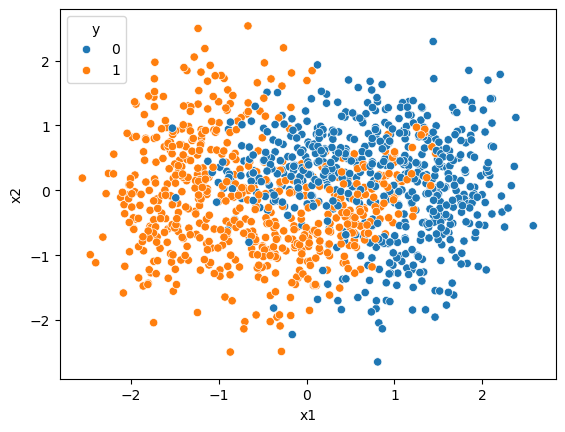

In [2]:
sns.scatterplot(x = df['x1'],y=df['x2'], hue = df['y'])

## Building a classifier model

### **Step 1:** Extract the features and the target variable

In supervised learning, we have to distinguish between the **features** and the **target variable** in our data. The features are the variables that we will use to predict the target variable. The target variable is the variable we want to predict (in this case, the class of a data point).

We will use $X$ to denote the features and $y$ to denote the target variable.

In [3]:
X = df[['x1', 'x2']]    # select only the 'x1' and 'x2' columns as features
y = df['y']             # select the 'y' column as the target variable

print('Features shape:', X.shape)
print('Target shape:', y.shape)

Features shape: (1200, 2)
Target shape: (1200,)


### **Step 2:** Split the data into train and test

The more data we have, and the more diverse our data is, the better our model will generally be. Nevertheless, we cannot use all the data we have available just for training - we must save some data just for **testing** the performance of our trained ML model. This small data chunk is called a **testing set**, and we will use it to assess how well our model works for new, previously unseen data. A model that correctly predicts **only** the labels of data it has been trained on is of no use to us - we already know the true labels after all.

For this, we will use a convenient function from `scikit-learn` called `train_test_split`. We can control the size of the testing set by setting the `test_size` parameter. The `random_state` parameter is used to ensure reproducibility of the split.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('Training set size:', len(X_train))
print('Testing set size:', len(X_test))

Training set size: 960
Testing set size: 240


### **Step 3**: Train a classifier and evaluate its performance

Now that we have our training set, we can train a classifier. We will use a simple classifier called `LogisticRegression` from `scikit-learn`. This classifier is a good starting point for binary classification problems. Logistic regression, despite its name, is a linear model for the task of **classification**. It tries to find the best linear decision boundary that separates the classes in the feature space.

As we have trained our classifier, we can now evaluate its performance and see how well it classifies the data. We will use the `accuracy_score` metric from `scikit-learn` to evaluate the performance of our classifier. The accuracy score is the proportion of correctly classified data points in the testing set.

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()  # instantiate the classifier

lr.fit(X_train, y_train)   # train the classifier

LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score

train_pred = lr.predict(X_train)  # make predictions on the training set
print('Training accuracy:', accuracy_score(y_train, train_pred))

test_pred = lr.predict(X_test)  # make predictions on the testing set
print('Testing accuracy:', accuracy_score(y_test, test_pred))

Training accuracy: 0.7958333333333333
Testing accuracy: 0.7833333333333333


## Visualizing the decision boundary

As we already know, the **logistic regression** model tries to find the best **linear decision boundary** that separates the classes in the feature space. We can visualize this decision boundary to better understand how the model works. 

I already implemented a function `plot_decision_boundary` that plots the decision boundary for a given classifier and data. You can import it from `helpers.plotting` module. **See how the decision boundary looks for our trained logistic regression model.**

C:\Users\kacpe\miniconda3\envs\pum24\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


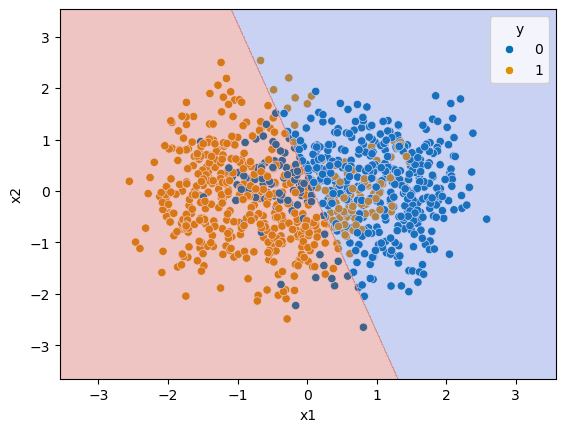

In [7]:
from helpers.plotting import plot_decision_boundary

plot_decision_boundary(lr, X_train, y_train) # arguments: classifier, features, target variable

## Measuring performance of a classifier

Before we go on to see how other classification models may deal with this task, let's discuss how to measure the performance of a trained classifier.

In binary classification, we have four possible outcomes for each sample:
- **True positive (TP)**: The classifier correctly predicted the positive class.
- **True negative (TN)**: The classifier correctly predicted the negative class.
- **False positive (FP)**: The classifier incorrectly predicted the positive class.
- **False negative (FN)**: The classifier incorrectly predicted the negative class.

Those outcomes can be summarized in what is known as a **confusion matrix**.

<center>
<img src="imgs/confusion-matrix.png" width=300>
</center>

The two most common metrics for binary classification are **accuracy** and **ROC AUC**.

**Accuracy** is the ratio of correctly predicted observations to the total observations. It is a simple metric, but it can be misleading when the dataset is imbalanced. For example, if 95% of the samples belong to class 0, a classifier that always predicts class 0 will achieve 95% accuracy. 

$$\text{Accuracy} = \frac{\text{correct predictions}}{\text{all predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$$
    
**ROC AUC** is a more robust metric for imbalanced datasets. You can read about the maths behind it in [this cool online ML course by Google.](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc) **ROC AUC score is the probability that the classifier will rank a randomly chosen positive sample higher than a randomly chosen negative sample.**

Accuracy and ROC AUC metrics are implemented in the `sklearn` library, and to import them, you can use the following code:
    
```python
from sklearn.metrics import accuracy_score, roc_auc_score
```

## Exercise 2: Try other classification models (4 points)

Although logistic regression is one of the simplest regression models, it can fit the data really well, especially for feature spaces of multiple dimensions. However, there are many other regression models that we can try.

Try other regression models from the `sklearn` library and compare their performance to the linear regression model. The interface of all scikit-learn models is quite the same, including `.fit` and `.predict` methods we used earlier for fitting the model to data and making predictions about new data with our linear regression model. 

Some of the more frequently used classifiers include **support vector machines** and **decision trees**. You may want try the `SVC` (Support Vector Classifier) and `DecisionTreeClassifier`, and `KNeighborsClassifier` models for the task. You can refer to the official documentation for [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), and [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for more information.

1. Try the `SVC` model and evaluate its performance in terms of **accuracy** and **ROC AUC**. Plot the decision boundary.
2. Try the `DecisionTreeClassifier` model and evaluate its performance. Plot the decision boundary.
3. Try the `KNeighborsClassifier` model and evaluate its performance. Plot the decision boundary.
4. Compare the performance of the three models. **Which one generalizes best to new data?**

In [8]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
...

Ellipsis

### SVC Implementation

In [9]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [10]:
#accuracy_score
svc_test_pred = svc.predict(X_test)
svc_train_pred = svc.predict(X_train)

print(f'Test prediction accuracy: {accuracy_score(y_test,svc_test_pred)}')
print(f'Train prediction accuracy: {accuracy_score(y_train,svc_train_pred)}')

svc_roc_score_test = roc_auc_score(y_test,svc.predict(X_test))
svc_roc_score_train = roc_auc_score(y_train,svc.predict(X_train)) 

print('\n')
print( f'Test roc auc score: {svc_roc_score_test}')
print(f'Train roc auc score: {svc_roc_score_train}')
                                

Test prediction accuracy: 0.8625
Train prediction accuracy: 0.8427083333333333


Test roc auc score: 0.8593477806424641
Train roc auc score: 0.8431135073188518


C:\Users\kacpe\miniconda3\envs\pum24\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


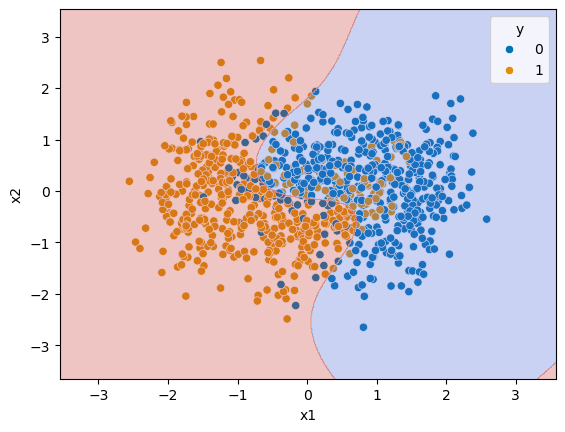

In [11]:
plot_decision_boundary(svc, X_train, y_train)

### DecisionTreeClassifier Implementation

In [12]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
tree_test_pred = tree.predict(X_test)
tree_train_pred = tree.predict(X_train)


print(f'Test prediction accuracy: {accuracy_score(y_test,tree_test_pred)}')
print(f'Train prediction accuracy: {accuracy_score(y_train,tree_train_pred)}')

tree_roc_score_test = roc_auc_score(y_test,svc.predict(X_test))
tree_roc_score_train = roc_auc_score(y_train,svc.predict(X_train)) 

print('\n')
print( f'Test roc auc score: {tree_roc_score_test}')
print(f'Train roc auc score: {tree_roc_score_train}')

Test prediction accuracy: 0.7708333333333334
Train prediction accuracy: 1.0


Test roc auc score: 0.8593477806424641
Train roc auc score: 0.8431135073188518


C:\Users\kacpe\miniconda3\envs\pum24\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


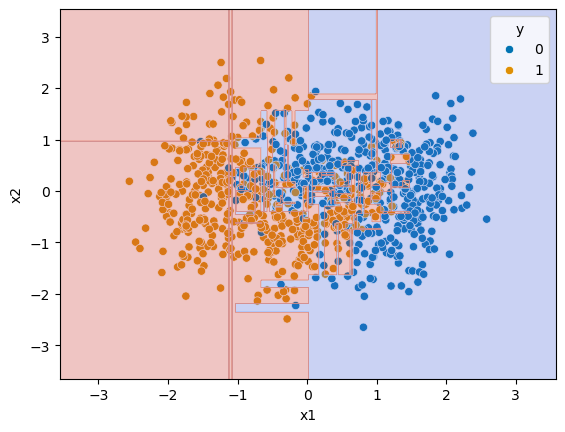

In [14]:
plot_decision_boundary(tree, X_train, y_train)

### KNeighborsClassifier Implementation

In [15]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
knc_test_pred = knc.predict(X_test)
knc_train_pred = knc.predict(X_train)


print(f'Test prediction accuracy: {accuracy_score(y_test,knc_test_pred)}')
print(f'Train prediction accuracy: {accuracy_score(y_train,knc_train_pred)}')

knc_roc_score_test = roc_auc_score(y_test,knc.predict(X_test))
knc_roc_score_train = roc_auc_score(y_train,knc.predict(X_train)) 

print('\n')
print( f'Test roc auc score: {knc_roc_score_test}')
print(f'Train roc auc score: {knc_roc_score_train}')

Test prediction accuracy: 0.8166666666666667
Train prediction accuracy: 0.8697916666666666


Test roc auc score: 0.8155529231412444
Train roc auc score: 0.8700708444027712


C:\Users\kacpe\miniconda3\envs\pum24\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


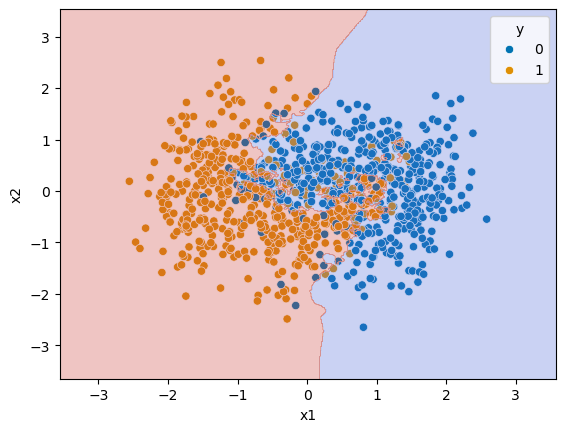

In [17]:
plot_decision_boundary(knc, X_train, y_train)

Conclusions:   KNeighborsClassifier is the best option - highest values of test roc_auc_score and and test prediction accuracy.

## Additional metrics: Precision and Recall

Accuracy and ROC AUC are useful metrics, but sometimes we may want to probe our classification model for some more specific properties. Let's take a look at the confusion matrix and derive two important metrics: **precision** and **recall**.

<center>
<img src="imgs/precision-recall.png" width=600>
</center>
</br>

- **Precision** is a useful metric when the cost of producing a false positives is high. Imagine that your classifier model is trained to predict if a mushroom is edible or poisonous. The cost of making a mistake and classifying a poisonous mushroom as edible (**FP**) is very high, as we may happen to need a liver transplant in that case. With high precision we sacrifice some **TP** for the sake of avoiding **FP**.

- **Recall** is a useful metric when we do not care about false positives too much, and just want to catch as many positive samples as possible. If your classifier is trained for some medical screening task, we want to catch as many sick patients as possible (**TP**), even if it means that some healthy patients will be classified as sick (**FP**). The cost of false positive is not high in this case, as the healthy patient will be correctly diagnosed later, in more rigorous tests.

Confusion matrix and metrics derived from it (including precision and recall) are implemented in the `sklearn` library, and you can import them using the following code:
    
```python
from sklearn.metrics import confusion_matrix, precision_score, recall_score
```

## Exercise 3: Misclassification analysis (2 points)

Which of the trained models, `SVC`, `DecisionTreeClassifier`, or `KNeighborsClassifier`, is the **least likely to classify a negative sample as positive?** Calculate an appropriate metric to answer this question and prepare a **barplot** visualizing the metric for each of the models.

In [18]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

Precision score: 
 SVC: 0.5294117647058824 
 DecisionTreeClassifier: 0.5454545454545454 
 KNeighborsClassifier:0.5405405405405406


<Axes: xlabel='Method', ylabel='Precision Score'>

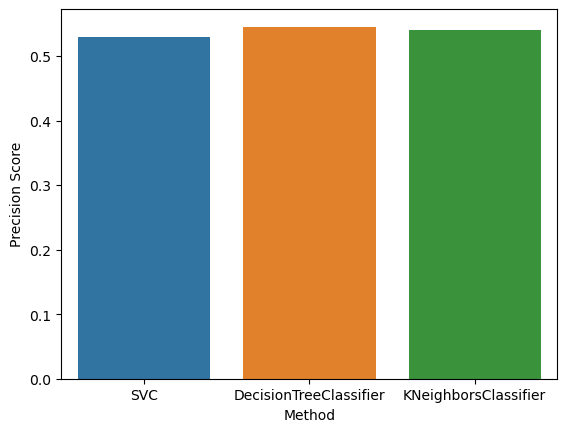

In [25]:
svc_precision = precision_score(y_test,svc_test_pred)
tree_precision = precision_score(y_test,tree_test_pred)
knc_precision = precision_score(y_test,knc_test_pred)
print(f'Precision score: \n SVC: {svc_precision} \n DecisionTreeClassifier: {tree_precision} \n KNeighborsClassifier:{knc_precision}')

method = ['SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier']
precision_values = [svc_precision, tree_precision, knc_precision]
data = {'Method': method, 'Precision Score' : precision_values} 
precision_df = pd.DataFrame(data)

sns.barplot(data = precision_df, x = precision_df['Method'], y = precision_df['Precision Score'],hue = precision_df['Method'])

DecisionTreeClasifier is least likely to classify a negative sample as positive one (the highest value of precision).

## Hyperparameter tuning

While the SVC did rather well, the out-of-the-box decision tree classifier had trouble correctly fitting to the data. We can try to tune the **hyperparameters** of the decision tree classifier to see if we can improve its performance on this dataset.

Hyperparameters are the parameters of a model that are not directly learned within estimators. Instead, they are to be set by us before fitting the model to data. In scikit-learn, hyperparameters are passed as arguments to the constructor of the estimator classes. We can try to tune the hyperparameters of the decision tree classifier to see if we can improve its performance on this dataset.

For the list of available hyperparametes, check [the documentation for DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

### Validation dataset

When we are tuning the hyperparameters of our model, we should not use the testing set to measure the model's performance. If we did, we would find ourselves with a problem called **data leak** - a situation in which a model we constructed is biased to perform well on a particular test set, because we tuned its hyperparameters to perform well on this set (thus, the data 'leaks' from tho testing set to the model building process). 

To prevent it, we could first split the training set into two parts: the actual training set and the validation set. We will use the validation set to evaluate the model's performance during hyperparameter tuning. The testing set should be used only once, after we have tuned the hyperparameters and trained the model on the training set.

<center>
<img src="imgs/simple-validation.png" width="800">
</center>

## Exercise 4: Tune the decision tree hyperparameters (2 point)

1. Try to tune the hyperparameters of the `DecisionTreeClassifier` model to improve its performance on the dataset. You can try different values for the `max_depth`, `min_samples_split`, `min_samples_leaf` and `max_features` hyperparameters.

    Remember that you should tune the model based on the **validation set** metric (accuracy or ROC AUC), but the final score should be calculated on the **testing set**. Below is a piece of code that splits the training set into the actual training set and the validation set. **Report the best hyperparameters you found and the model's performance on the testing set.**

In [27]:
# We can use the train_test_split function to split the training set into the actual training set and the validation set

# First, we split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, we split the training set into the actual training set and the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [28]:
# Try different hyperparameters for the DecisionTreeClassifier

dc = DecisionTreeClassifier(max_depth = 3, min_samples_split = 3, min_samples_leaf = 3, max_features = 3,min_weight_fraction_leaf=0.3)

In [29]:
dc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_leaf=3,
                       min_samples_split=3, min_weight_fraction_leaf=0.3)

In [30]:
val_pred = dc.predict(X_val)
print(accuracy_score(y_val,val_pred))
print(precision_score(y_val,val_pred))

0.765625
0.9629629629629629


In [31]:
test_pred = dc.predict(X_test)
print(accuracy_score(y_test,test_pred))
print(precision_score(y_test,test_pred))

0.7875
0.9404761904761905


-------------------------------------------------

The best parameters for DecisionTreeClasifier:
- max_depth = 3,
- max_features = 3,
- min_samples_leaf = 3,
- min_samples_split = 3,
- min_weight_fraction_leaf = 0.3.
  